<a href="https://colab.research.google.com/github/kimgoden/Study/blob/main/Kaggle_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 캐글

## 캐글 : 주택가격 데이터 분석

### 캐글 데이터셋을 불러온다

In [1]:
!pip install kaggle

### 내가 참여한 대회의 .json 파일을 colab에 임포트 해준다.

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 64 bytes


### 대회에 사용되는 데이터를 다운로드 및 불러오기

In [3]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         63           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes         81           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        487           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        158           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1456           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      14873           False  
house-pr

In [4]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 60.6MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 28.2MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 23.2MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 64.1MB/s]


In [5]:
import pandas as pd 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('Data Loading is done!')

Data Loading is done!


### 데이터 둘러보기

In [6]:
print("The shape of Train Data is:", train.shape)
print("The shape of Test Data is:", test.shape)
# 각 데이터의 행렬값을 출력해준다.

The shape of Train Data is: (1460, 81)
The shape of Test Data is: (1459, 80)


In [7]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## Feature Engineering

### 이상치를 제거한다.

In [9]:
train.drop(train[(train['OverallQual']<4) & (train['SalePrice']> 200000)].index, inplace=True)
train.drop(train[(train['OverallCond']<4) & (train['SalePrice']> 200000)].index, inplace=True)
train.reset_index(drop=True, inplace=True)
print(train.shape)

(1458, 81)


### 종속변수의 로그 변환
- 히스토그램으로 시각화

The value of mu before log transformation is: 180761.24142661178
The value of sigma before log transformation is: 79270.93617295024


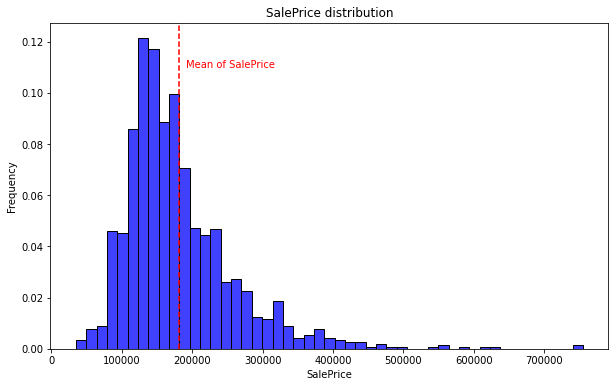

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

(mu, sigma) = norm.fit(train['SalePrice'])
print("The value of mu before log transformation is:", mu)
print("The value of sigma before log transformation is:", sigma)

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(train['SalePrice'], color="b", stat="probability")
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")

plt.axvline(mu, color='r', linestyle='--')
plt.text(mu + 10000, 0.11, 'Mean of SalePrice', rotation=0, color='r')
fig.show()

- 종속변수(주택가격)이 한쪽으로 치우쳐 있기 때문에 예측 성능 상승을 위해 로그를 변환시켜준다.

The value of mu before log transformation is: 12.0233397799989
The value of sigma before log transformation is: 0.3989191793099824


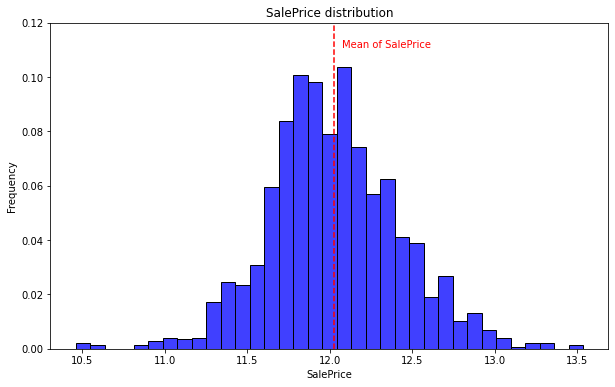

In [11]:
import numpy as np 

train["SalePrice"] = np.log1p(train["SalePrice"])

(mu, sigma) = norm.fit(train['SalePrice'])
print("The value of mu before log transformation is:", mu)
print("The value of sigma before log transformation is:", sigma)

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(train['SalePrice'], color="b", stat="probability")
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")

plt.axvline(mu, color='r', linestyle='--')
plt.text(mu + 0.05, 0.111, 'Mean of SalePrice', rotation=0, color='r')
plt.ylim(0, 0.12)
fig.show()

### 데이터 ID 값 제거
 - 로그를 변환해주고나서 데이터(종속변수)가 변환된걸 볼 수 있다
 - 분석을 위해 사용되지 않을 변수를 추출해준다.

In [12]:
train_ID = train['Id']
test_ID = test['Id']
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)
train.shape, test.shape

((1458, 80), (1459, 79))

### Y값을 추출한다.

In [13]:
y = train['SalePrice'].reset_index(drop=True)
train = train.drop('SalePrice', axis = 1)
train.shape, test.shape, y.shape

((1458, 79), (1459, 79), (1458,))

### 데이터 합치기

In [14]:
all_df = pd.concat([train, test]).reset_index(drop=True)
all_df.shape

(2917, 79)

### 데이터 결측치 확인

In [15]:
def check_na(data, head_num = 6):
  isnull_na = (data.isnull().sum() / len(data)) * 100
  data_na = isnull_na.drop(isnull_na[isnull_na == 0].index).sort_values(ascending=False)
  missing_data = pd.DataFrame({'Missing Ratio' :data_na, 
                               'Data Type': data.dtypes[data_na.index]})
  print("결측치 데이터 컬럼과 건수:\n", missing_data.head(head_num))

check_na(all_df, 20)

결측치 데이터 컬럼과 건수:
               Missing Ratio Data Type
PoolQC            99.657182    object
MiscFeature       96.400411    object
Alley             93.212204    object
Fence             80.425094    object
FireplaceQu       48.680151    object
LotFrontage       16.626671   float64
GarageFinish       5.450806    object
GarageYrBlt        5.450806   float64
GarageQual         5.450806    object
GarageCond         5.450806    object
GarageType         5.382242    object
BsmtExposure       2.811107    object
BsmtCond           2.811107    object
BsmtQual           2.776826    object
BsmtFinType2       2.742544    object
BsmtFinType1       2.708262    object
MasVnrType         0.788481    object
MasVnrArea         0.754200   float64
MSZoning           0.137127    object
BsmtFullBath       0.068564   float64


### 결측치 제거

In [16]:
all_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1, inplace=True)
check_na(all_df)

결측치 데이터 컬럼과 건수:
               Missing Ratio Data Type
GarageQual         5.450806    object
GarageFinish       5.450806    object
GarageYrBlt        5.450806   float64
GarageCond         5.450806    object
GarageType         5.382242    object
BsmtCond           2.811107    object


### 결측치 채우기

In [17]:
print(all_df['BsmtCond'].value_counts())
print()
print(all_df['BsmtCond'].mode()[0])

TA    2604
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

TA


In [18]:
import numpy as np
cat_all_vars = train.select_dtypes(exclude=[np.number])
print("The whole number of all_vars", len(list(cat_all_vars)))

final_cat_vars = []
for v in cat_all_vars:
    if v not in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']:
        final_cat_vars.append(v)

print("The whole number of final_cat_vars", len(final_cat_vars))
for i in final_cat_vars:
  all_df[i] = all_df[i].fillna(all_df[i].mode()[0])

check_na(all_df, 20)

The whole number of all_vars 43
The whole number of final_cat_vars 38
결측치 데이터 컬럼과 건수:
               Missing Ratio Data Type
GarageYrBlt        5.450806   float64
MasVnrArea         0.754200   float64
BsmtHalfBath       0.068564   float64
BsmtFullBath       0.068564   float64
GarageArea         0.034282   float64
GarageCars         0.034282   float64
TotalBsmtSF        0.034282   float64
BsmtUnfSF          0.034282   float64
BsmtFinSF2         0.034282   float64
BsmtFinSF1         0.034282   float64


In [19]:
import numpy as np
num_all_vars = list(train.select_dtypes(include=[np.number]))
print("The whole number of all_vars", len(num_all_vars))

num_all_vars.remove('LotFrontage')

print("The whole number of final_cat_vars", len(num_all_vars))
for i in num_all_vars:
  all_df[i].fillna(value=all_df[i].median(), inplace=True)

check_na(all_df, 20)

The whole number of all_vars 36
The whole number of final_cat_vars 35
결측치 데이터 컬럼과 건수:
 Empty DataFrame
Columns: [Missing Ratio, Data Type]
Index: []


### 왜도(Skewnewss) 처리하기
- 왜도 데이터 확인

In [20]:
from scipy.stats import skew

def find_skew(x):
  return skew(x)

skewness_features = all_df[num_all_vars].apply(find_skew).sort_values(ascending=False)
skewness_features

MiscVal          21.939672
PoolArea         16.892477
LotArea          12.867139
LowQualFinSF     12.084539
3SsnPorch        11.372080
KitchenAbvGr      4.318923
BsmtFinSF2        4.144503
EnclosedPorch     4.013741
ScreenPorch       3.945101
BsmtHalfBath      3.929996
MasVnrArea        2.615714
OpenPorchSF       2.534326
WoodDeckSF        1.841876
1stFlrSF          1.469798
BsmtFinSF1        1.429239
MSSubClass        1.374726
GrLivArea         1.271773
TotalBsmtSF       1.165468
BsmtUnfSF         0.919795
2ndFlrSF          0.860643
TotRmsAbvGrd      0.760404
Fireplaces        0.734449
HalfBath          0.695072
BsmtFullBath      0.626733
OverallCond       0.584601
BedroomAbvGr      0.329555
GarageArea        0.241611
OverallQual       0.196514
MoSold            0.195229
FullBath          0.164226
YrSold            0.132129
GarageCars       -0.218309
GarageYrBlt      -0.398311
YearRemodAdd     -0.451063
YearBuilt        -0.600023
dtype: float64

-  박스플롯 형태로 시각화

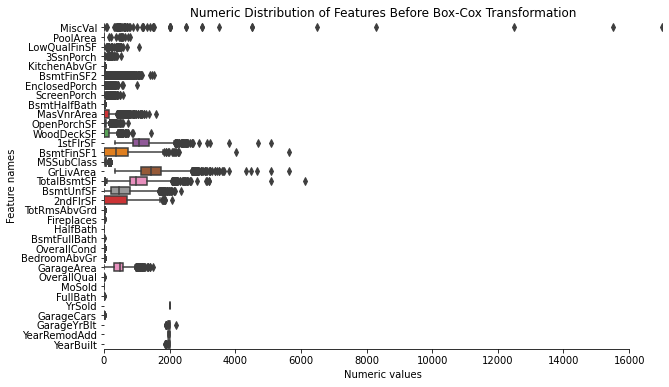

In [21]:
skewnewss_index = list(skewness_features.index)
skewnewss_index.remove('LotArea')
all_numeric_df = all_df.loc[:, skewnewss_index]

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, all_numeric_df.max().sort_values(ascending=False)[0])
ax = sns.boxplot(data=all_numeric_df[skewnewss_index] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features Before Box-Cox Transformation")
sns.despine(trim=True, left=True)

- 왜도 데이터 삭제

In [22]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

high_skew = skewness_features[skewness_features > 1]
high_skew_index = high_skew.index

print("The data before Box-Cox Transformation: \n", all_df[high_skew_index].head())

for num_var in high_skew_index:
  all_df[num_var] = boxcox1p(all_df[num_var], boxcox_normmax(all_df[num_var] + 1))

print("The data after Box-Cox Transformation: \n", all_df[high_skew_index].head())

The data before Box-Cox Transformation: 
    MiscVal  PoolArea  LotArea  ...  MSSubClass  GrLivArea  TotalBsmtSF
0        0         0     8450  ...          60       1710        856.0
1        0         0     9600  ...          20       1262       1262.0
2        0         0    11250  ...          60       1786        920.0
3        0         0     9550  ...          70       1717        756.0
4        0         0    14260  ...          60       2198       1145.0

[5 rows x 18 columns]
The data after Box-Cox Transformation: 
    MiscVal  PoolArea    LotArea  ...  MSSubClass  GrLivArea  TotalBsmtSF
0      0.0       0.0  13.454344  ...    6.505897   7.219262   294.614887
1      0.0       0.0  13.725427  ...    4.252612   6.933523   404.051498
2      0.0       0.0  14.066408  ...    6.505897   7.260108   312.423510
3      0.0       0.0  13.714276  ...    6.869385   7.223100   266.274241
4      0.0       0.0  14.584552  ...    6.505897   7.454890   373.304502

[5 rows x 18 columns]


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


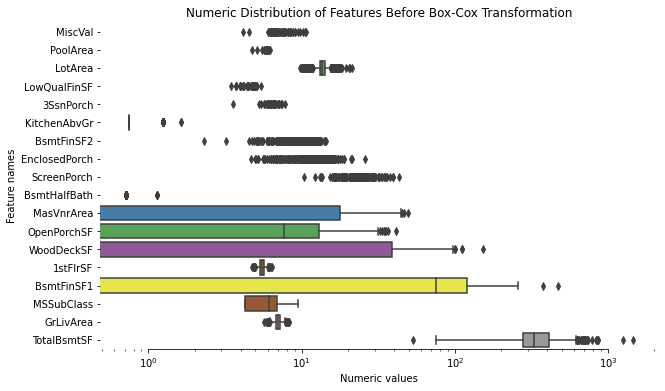

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xscale('log')
ax = sns.boxplot(data=all_df[high_skew_index] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features Before Box-Cox Transformation")
sns.despine(trim=True, left=True)

### 도출변수
- 집의 크기에 해당하는 변수를 묶어서 처리해준다.

In [ ]:
all_df['TotalSF'] = all_df['TotalBsmtSF'] + all_df['1stFlrSF'] + all_df['2ndFlrSF']
all_df = all_df.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1)
print(all_df.shape)

- 집의 욕조, 풀장과 같은 옵션을 하나로 묶는다.

In [ ]:
all_df['Total_Bathrooms'] = (all_df['FullBath'] + (0.5 * all_df['HalfBath']) + all_df['BsmtFullBath'] + (0.5 * all_df['BsmtHalfBath']))
all_df['Total_porch_sf'] = (all_df['OpenPorchSF'] + all_df['3SsnPorch'] + all_df['EnclosedPorch'] + all_df['ScreenPorch'])
all_df = all_df.drop(['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch'], axis=1)
print(all_df.shape)

- 집의 준공연도, 리모델링연도, 판매연도, 등 기간에 관한 변수를 하나로 묶는다.

In [25]:
num_all_vars = list(train.select_dtypes(include=[np.number]))
year_feature = []
for var in num_all_vars:
  if 'Yr' in var:
    year_feature.append(var)
  elif 'Year' in var:
    year_feature.append(var)
  else:  
    print(var, "is not related with Year")
print(year_feature)

MSSubClass is not related with Year
LotFrontage is not related with Year
LotArea is not related with Year
OverallQual is not related with Year
OverallCond is not related with Year
MasVnrArea is not related with Year
BsmtFinSF1 is not related with Year
BsmtFinSF2 is not related with Year
BsmtUnfSF is not related with Year
TotalBsmtSF is not related with Year
1stFlrSF is not related with Year
2ndFlrSF is not related with Year
LowQualFinSF is not related with Year
GrLivArea is not related with Year
BsmtFullBath is not related with Year
BsmtHalfBath is not related with Year
FullBath is not related with Year
HalfBath is not related with Year
BedroomAbvGr is not related with Year
KitchenAbvGr is not related with Year
TotRmsAbvGrd is not related with Year
Fireplaces is not related with Year
GarageCars is not related with Year
GarageArea is not related with Year
WoodDeckSF is not related with Year
OpenPorchSF is not related with Year
EnclosedPorch is not related with Year
3SsnPorch is not rela

- 해당 데이터를 히트맵으로 시각화한다.

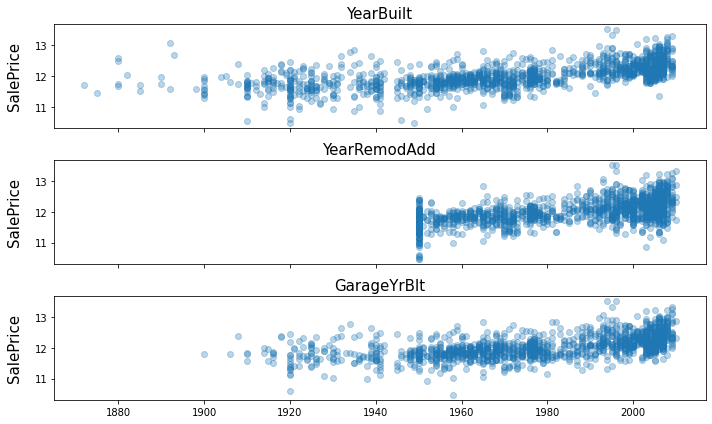

In [26]:
fig, ax = plt.subplots(3, 1, figsize=(10, 6), sharex=True, sharey=True)
for i, var in enumerate(year_feature):
  if var != 'YrSold':
    ax[i].scatter(train[var], y, alpha=0.3)
    ax[i].set_title('{}'.format(var), size=15)
    ax[i].set_ylabel('SalePrice', size=15, labelpad=12.5)
plt.tight_layout()
plt.show()

- 해당 데이터에서 리모델링 데이터를 드롭해준다.

In [27]:
all_df = all_df.drop(['YearBuilt', 'GarageYrBlt'], axis=1)
print(all_df.shape)

(2917, 71)


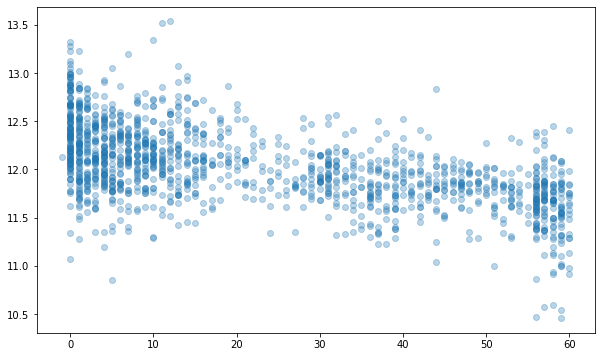

In [28]:
YearsSinceRemodel = train['YrSold'].astype(int) - train['YearRemodAdd'].astype(int)

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(YearsSinceRemodel, y, alpha=0.3)
fig.show()

In [ ]:
all_df['YearsSinceRemodel'] = all_df['YrSold'].astype(int) - all_df['YearRemodAdd'].astype(int)
all_df = all_df.drop(['YrSold', 'YearRemodAdd'], axis=1)
print(all_df.shape)all_df['YearsSinceRemodel'] = all_df['YrSold'].astype(int) - all_df['YearRemodAdd'].astype(int)
all_df = all_df.drop(['YrSold', 'YearRemodAdd'], axis=1)
print(all_df.shape)

### 더미변수

In [29]:
all_df['PoolArea'].value_counts()

0.000000    2904
4.721829       1
5.913421       1
6.161330       1
5.854879       1
5.786591       1
5.553561       1
5.843016       1
6.048366       1
5.130821       1
6.231252       1
5.945809       1
5.922801       1
5.718338       1
Name: PoolArea, dtype: int64

In [30]:
def count_dummy(x):
  if x > 0:
    return 1
  else:
    return 0

In [31]:
all_df['PoolArea'] = all_df['PoolArea'].apply(count_dummy)
all_df['PoolArea'].value_counts()

0    2904
1      13
Name: PoolArea, dtype: int64

In [32]:
all_df['GarageArea'] = all_df['GarageArea'].apply(count_dummy)
all_df['GarageArea'].value_counts()

1    2760
0     157
Name: GarageArea, dtype: int64

In [33]:
all_df['Fireplaces'] = all_df['Fireplaces'].apply(count_dummy)
all_df['Fireplaces'].value_counts()

1    1497
0    1420
Name: Fireplaces, dtype: int64

### 문자열 데이터를 변환해준다(Label Encoding, Ordinal Encoding, One-Hot Encoding)

In [34]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

temp = pd.DataFrame({'Food_Name': ['Apple', 'Chicken', 'Broccoli'], 
                     'Calories': [95, 231, 50]})

encoder = LabelEncoder()
encoder.fit(temp['Food_Name'])
labels = encoder.transform(temp['Food_Name'])
print(list(temp['Food_Name']), "==>", labels)

['Apple', 'Chicken', 'Broccoli'] ==> [0 2 1]


In [35]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

temp = pd.DataFrame({'Food_Name': ['Apple', 'Chicken', 'Broccoli'], 
                     'Calories': [95, 231, 50]})

encoder = OrdinalEncoder()
labels = encoder.fit_transform(temp[['Food_Name']])
print(list(temp['Food_Name']), "==>", labels.tolist())

['Apple', 'Chicken', 'Broccoli'] ==> [[0.0], [2.0], [1.0]]


In [36]:
import pandas as pd
temp = pd.DataFrame({'Food_Name': ['Apple', 'Chicken', 'Broccoli'], 
                     'Calories': [95, 231, 50]})

temp[['Food_No']] = temp.Food_Name.replace(to_replace = ['Chicken', 'Broccoli', 'Apple'], 
                       value = [1, 2, 3])

print(temp[['Food_Name', 'Food_No']])

  Food_Name  Food_No
0     Apple        3
1   Chicken        1
2  Broccoli        2


In [37]:
import pandas as pd

temp = pd.DataFrame({'Food_Name': ['Apple', 'Chicken', 'Broccoli'], 
                     'Calories': [95, 231, 50]})

temp = pd.get_dummies(temp)
print(temp)
print(temp.shape)

   Calories  Food_Name_Apple  Food_Name_Broccoli  Food_Name_Chicken
0        95                1                   0                  0
1       231                0                   0                  1
2        50                0                   1                  0
(3, 4)


In [38]:
all_df = pd.get_dummies(all_df).reset_index(drop=True)
all_df.shape

(2917, 267)

## 머신러닝 모형 학습 및 평가

### 데이터셋 분리 및 교차 검증

In [39]:
X = all_df.iloc[:len(y), :]
X_test = all_df.iloc[len(y):, :]
X.shape, y.shape, X_test.shape

((1458, 267), (1458,), (1459, 267))

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1093, 267), (365, 267), (1093,), (365,))

- 평가지표

   1. MAE

In [41]:
import numpy as np

def mean_absolute_error(y_true, y_pred):

  error = 0
  for yt, yp in zip(y_true, y_pred):
    error = error + np.abs(yt-yp)
  
  mae = error / len(y_true)
  return mae

   2. MSE

In [42]:
import numpy as np

def mean_squared_error(y_true, y_pred):

  error = 0
  for yt, yp in zip(y_true, y_pred):
    error = error + (yt - yp) ** 2
  
  mse = error / len(y_true)
  return mse

   3. RMSE

In [43]:
import numpy as np

def root_rmse_squared_error(y_true, ypred):
  error = 0
  
  for yt, yp in zip(y_true, y_pred):
    error = error + (yt - yp) ** 2
  
  mse = error / len(y_true)
  rmse = np.round(np.sqrt(mse), 3)
  return rmse

   4. TEST1

In [44]:
y_true = [400, 300, 800]
y_pred = [380, 320, 777]

print("MAE:", mean_absolute_error(y_true, y_pred))
print("MSE:", mean_squared_error(y_true, y_pred))
print("RMSE:", root_rmse_squared_error(y_true, y_pred))

MAE: 21.0
MSE: 443.0
RMSE: 21.048


   5. TEST2

In [45]:
y_true = [400, 300, 800, 900]
y_pred = [380, 320, 777, 600]

print("MAE:", mean_absolute_error(y_true, y_pred))
print("MSE:", mean_squared_error(y_true, y_pred))
print("RMSE:", root_rmse_squared_error(y_true, y_pred))

MAE: 90.75
MSE: 22832.25
RMSE: 151.103


   6. RMSE with Sklean

In [46]:
from sklearn.metrics import mean_squared_error

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

   - 모형 정의 및 검증 평가

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

def cv_rmse(model, n_folds=5):
    cv = KFold(n_splits=n_folds, random_state=42, shuffle=True)
    rmse_list = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv))
    print('CV RMSE value list:', np.round(rmse_list, 4))
    print('CV RMSE mean value:', np.round(np.mean(rmse_list), 4))
    return (rmse_list)

n_folds = 5
rmse_scores = {}
lr_model = LinearRegression()

In [48]:
score = cv_rmse(lr_model, n_folds)
print("linear regression - mean: {:.4f} (std: {:.4f})".format(score.mean(), score.std()))
rmse_scores['linear regression'] = (score.mean(), score.std())

CV RMSE value list: [0.1399 0.1774 0.1514 0.1103 0.1059]
CV RMSE mean value: 0.137
linear regression - mean: 0.1370 (std: 0.0266)


 - 첫 번째 최종 예측 값 제출

In [49]:
from sklearn.model_selection import cross_val_predict

X = all_df.iloc[:len(y), :]
X_test = all_df.iloc[len(y):, :]
X.shape, y.shape, X_test.shape

lr_model_fit = lr_model.fit(X, y)
final_preds = np.floor(np.expm1(lr_model_fit.predict(X_test)))
print(final_preds)

[118145. 158483. 187263. ... 176406. 116009. 217705.]


In [50]:
submission = pd.read_csv("sample_submission.csv")
submission.iloc[:,1] = final_preds
print(submission.head())
submission.to_csv("The_first_regression.csv", index=False)

     Id  SalePrice
0  1461   118145.0
1  1462   158483.0
2  1463   187263.0
3  1464   197385.0
4  1465   200573.0
